In [1]:
from src import PINNViga
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np
import json
import pandas as pd

EI = 1.0
q = 1.0 
L = 1.0

Epoch 0, Loss: 1.584760785103, PDE Loss: 1.565947294235, BC Loss: 0.018813548610
Epoch 60, Loss: 0.072954773903, PDE Loss: 0.030588293448, BC Loss: 0.042366482317
Epoch 120, Loss: 0.011079488322, PDE Loss: 0.006649593357, BC Loss: 0.004429894965
Epoch 180, Loss: 0.002050865674, PDE Loss: 0.001920798910, BC Loss: 0.000130066765
Epoch 240, Loss: 0.000336869271, PDE Loss: 0.000330727518, BC Loss: 0.000006141756
Epoch 274, Loss: 0.000096358541, PDE Loss: 0.000094982839, BC Loss: 0.000001375698
Treinamento interrompido na época 274 devido à falta de melhoria.


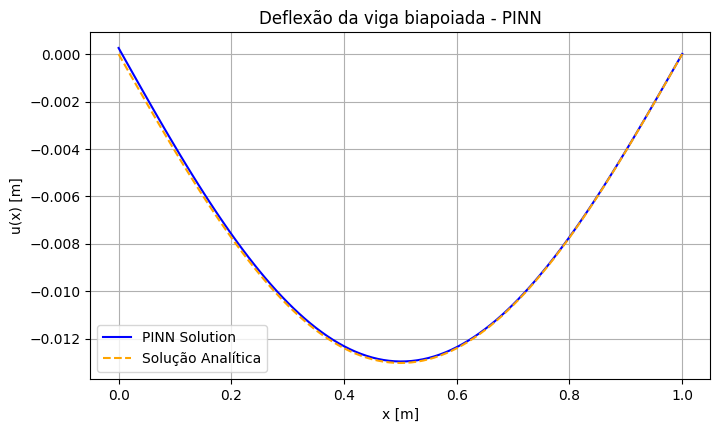

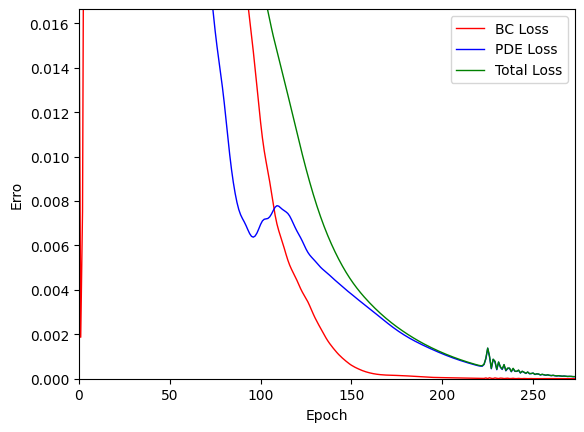

In [4]:
## VIGA BIAPOIADA

EI = 1.0
q = - 1.0 
L = 1.0

apoio_esq = [1, 1, 0]
apoio_dir = [0, 1, 0]

biapoiada = PINNViga.PINNViga()
biapoiada.run_model(apoio_esq, apoio_dir, EI, q, L, num_epochs=600, pde_weight=1, bc_weight=1)

def y_calc(x_val): 
    return (q * x_val / (24 * EI)) * (L**3 - 2 * L * x_val**2 + x_val**3)

plt.figure(figsize=(8, 4.5))
plt.plot(biapoiada.x_plot, biapoiada.u_plot, label='PINN Solution', color='blue')
plt.plot(biapoiada.x_plot, y_calc(biapoiada.x_plot), label='Solução Analítica', linestyle='dashed', color='orange')
plt.title("Deflexão da viga biapoiada - PINN")
plt.xlabel("x [m]")
plt.ylabel("u(x) [m]")
plt.grid(True)
plt.legend()
plt.show()

biapoiada.plot_errors(100)

Epoch 0, Loss: 1.584760785103, PDE Loss: 1.565947294235, BC Loss: 0.018813548610
Epoch 60, Loss: 0.072954773903, PDE Loss: 0.030588293448, BC Loss: 0.042366482317
Epoch 120, Loss: 0.011079488322, PDE Loss: 0.006649593357, BC Loss: 0.004429894965
Epoch 180, Loss: 0.002050865674, PDE Loss: 0.001920798910, BC Loss: 0.000130066765
Epoch 240, Loss: 0.000336869271, PDE Loss: 0.000330727518, BC Loss: 0.000006141756
Epoch 300, Loss: 0.000061884333, PDE Loss: 0.000061566156, BC Loss: 0.000000318174
Epoch 360, Loss: 0.000053463744, PDE Loss: 0.000053379681, BC Loss: 0.000000084063
Epoch 420, Loss: 0.000048092363, PDE Loss: 0.000047988658, BC Loss: 0.000000103705
Epoch 480, Loss: 0.000043123622, PDE Loss: 0.000043065473, BC Loss: 0.000000058150
Epoch 540, Loss: 0.000048014910, PDE Loss: 0.000047678492, BC Loss: 0.000000336419
Epoch 600, Loss: 0.000036886202, PDE Loss: 0.000036861893, BC Loss: 0.000000024308


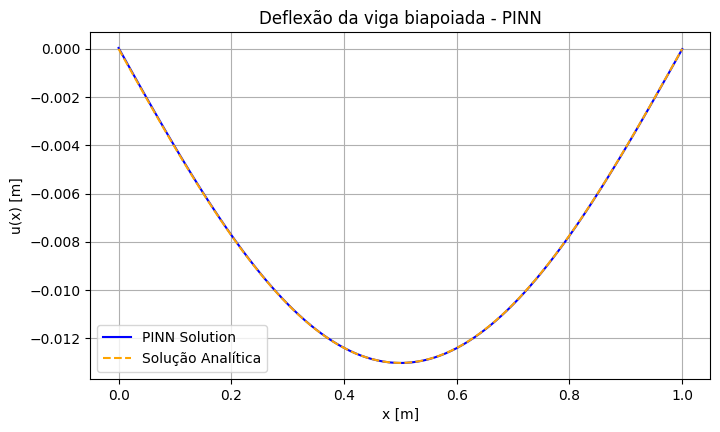

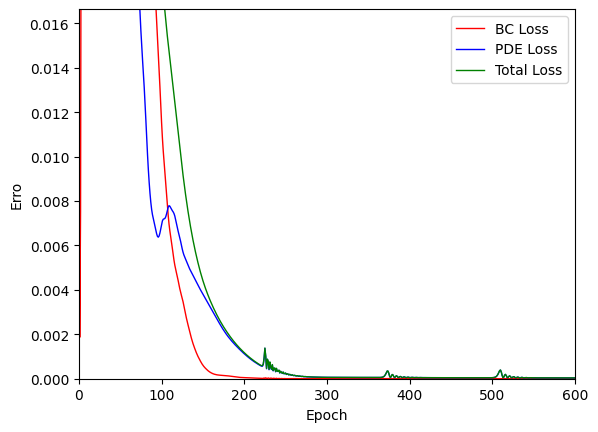

In [5]:
EI = 1.0
q = - 1.0 
L = 1.0

apoio_esq = [1, 1, 0]
apoio_dir = [0, 1, 0]

biapoiada = PINNViga.PINNViga()
biapoiada.run_model(apoio_esq, apoio_dir, EI, q, L, num_epochs=600, pde_weight=1, bc_weight=1, tol = 1e-5)

def y_calc(x_val): 
    return (q * x_val / (24 * EI)) * (L**3 - 2 * L * x_val**2 + x_val**3)

plt.figure(figsize=(8, 4.5))
plt.plot(biapoiada.x_plot, biapoiada.u_plot, label='PINN Solution', color='blue')
plt.plot(biapoiada.x_plot, y_calc(biapoiada.x_plot), label='Solução Analítica', linestyle='dashed', color='orange')
plt.title("Deflexão da viga biapoiada - PINN")
plt.xlabel("x [m]")
plt.ylabel("u(x) [m]")
plt.grid(True)
plt.legend()
plt.show()

biapoiada.plot_errors(100)

C:\Users\Tácio\AppData\Local\Temp\ipykernel_21848\2164762480.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


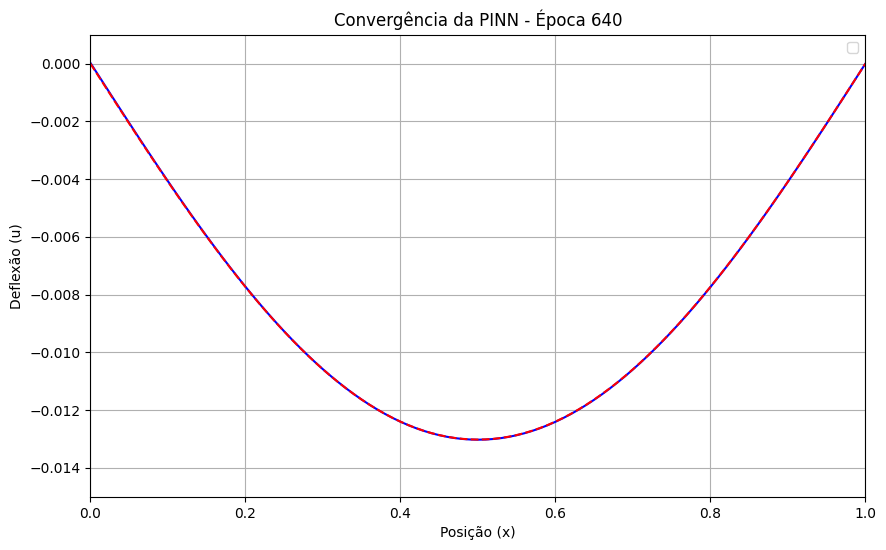

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Convergência da PINN")
ax.set_xlabel("Posição (x)")
ax.set_ylabel("Deflexão (u)")
ax.grid(True)
ax.set_xlim(0, 1)
ax.set_ylim(-0.015, 0.001)
ax.legend()

line_pinn, = ax.plot([], [], 'b-', label='Solução PINN')
line_analytic, = ax.plot(biapoiada.x_plot, y_calc(biapoiada.x_plot), 'r--', label='Solução Analítica')

def animate(i):

    epoch, u_pinn = biapoiada.u_plot_variation[i]
    line_pinn.set_data(biapoiada.x_plot, u_pinn)
    ax.set_title(f"Convergência da PINN - Época {epoch}")
    
    return line_pinn,

anim = FuncAnimation(fig, animate, frames=len(biapoiada.u_plot_variation), interval=50, blit=True)
writer = PillowWriter(fps=30)
anim.save("biapoiada_epoch_640_bc_1.gif", writer=writer)

plt.show()

Epoch 0, Loss: 1.575020670891, PDE Loss: 1.565947294235, BC Loss: 0.009073358960
Epoch 50, Loss: 0.061624672264, PDE Loss: 0.025065083057, BC Loss: 0.036559589207
Epoch 100, Loss: 0.014422575943, PDE Loss: 0.007896750234, BC Loss: 0.006525825709
Epoch 150, Loss: 0.001609210856, PDE Loss: 0.001543297083, BC Loss: 0.000065913831
Epoch 200, Loss: 0.000544239650, PDE Loss: 0.000536266074, BC Loss: 0.000007973599
Epoch 250, Loss: 0.000119110366, PDE Loss: 0.000118243508, BC Loss: 0.000000866858
Epoch 300, Loss: 0.000856304308, PDE Loss: 0.000847056042, BC Loss: 0.000009248238
Epoch 350, Loss: 0.000015392241, PDE Loss: 0.000015338897, BC Loss: 0.000000053344
Epoch 400, Loss: 0.000014034200, PDE Loss: 0.000014033663, BC Loss: 0.000000000537
Epoch 450, Loss: 0.000013802922, PDE Loss: 0.000013802144, BC Loss: 0.000000000777
Epoch 500, Loss: 0.000013568826, PDE Loss: 0.000013568065, BC Loss: 0.000000000761


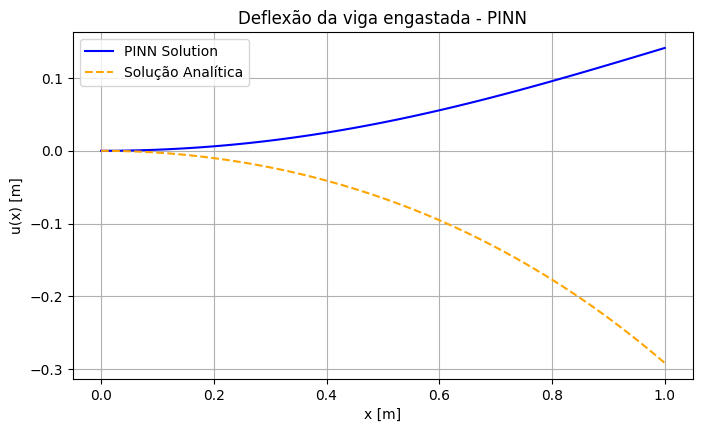

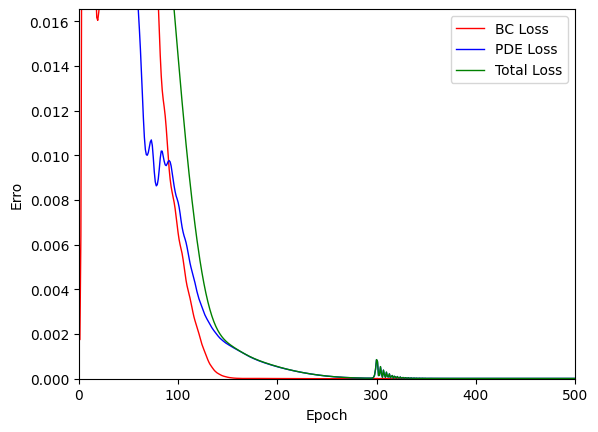

In [8]:
## VIGA ENGASTADA

apoio_esq = [1, 1, 1]
apoio_dir = [0, 0, 0]

EI = 1.0
q = - 1.0 
L = 1.0

engastada = PINNViga.PINNViga()
engastada.run_model(apoio_esq, apoio_dir, EI, q, L, num_epochs=500, pde_weight=1, bc_weight=1, tol = 1e-5)

def y_calc2(x): 
    return  (q * (x ** 2)/ (24 * EI)) * (6 * L ** 2 + x ** 2)

plt.figure(figsize=(8, 4.5))
plt.plot(engastada.x_plot, engastada.u_plot, label='PINN Solution', color='blue')
plt.plot(engastada.x_plot, y_calc2(engastada.x_plot), label='Solução Analítica', linestyle='dashed', color='orange')
plt.title("Deflexão da viga engastada - PINN")
plt.xlabel("x [m]")
plt.ylabel("u(x) [m]")
plt.grid(True)
plt.legend()
plt.show()

engastada.plot_errors(100)

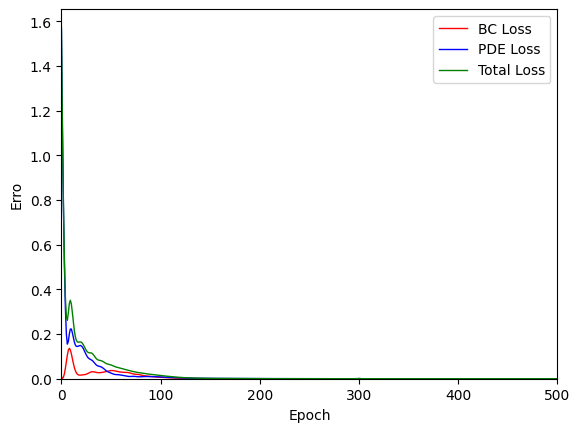

In [26]:
engastada.plot_errors()

C:\Users\Tácio\AppData\Local\Temp\ipykernel_2996\521982417.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


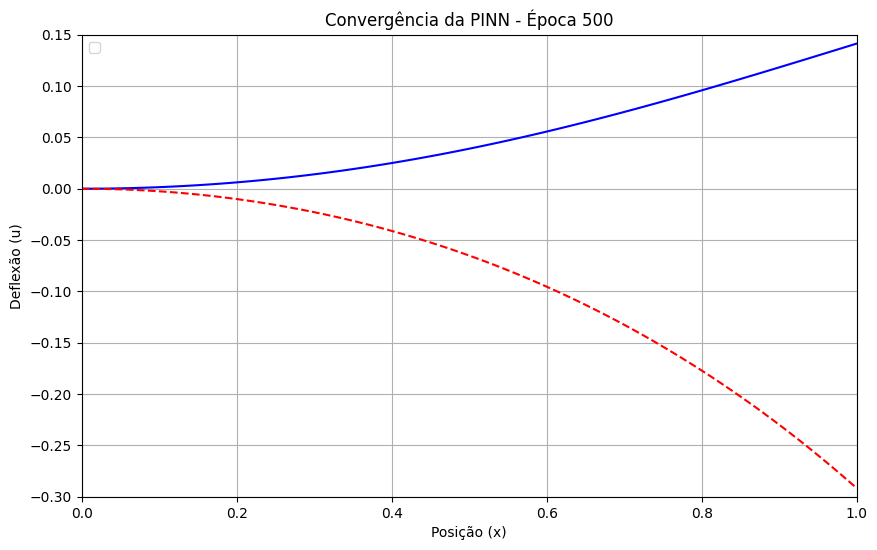

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Convergência da PINN")
ax.set_xlabel("Posição (x)")
ax.set_ylabel("Deflexão (u)")
ax.grid(True)
ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.15)
# ax.set_ylim(-0.015, 0.001)
ax.legend()

line_pinn, = ax.plot([], [], 'b-', label='Solução PINN')
line_analytic, = ax.plot(engastada.x_plot, y_calc2(engastada.x_plot), 'r--', label='Solução Analítica')

def animate(i):

    epoch, u_pinn = engastada.u_plot_variation[i]
    line_pinn.set_data(engastada.x_plot, u_pinn)
    ax.set_title(f"Convergência da PINN - Época {epoch}")
    
    return line_pinn,

anim = FuncAnimation(fig, animate, frames=len(engastada.u_plot_variation), interval=50, blit=True)
writer = PillowWriter(fps=30)
anim.save("engastada_epoch_500_bc_1.gif", writer=writer)

plt.show()